In [313]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [386]:
train_ds = pd.read_csv("data/train.csv",index_col="PassengerId")
test_ds = pd.read_csv("data/test.csv",index_col="PassengerId")

In [390]:
X = train_ds.copy()
y = X.pop("Survived")

In [392]:
from sklearn.preprocessing import OrdinalEncoder 

# get a baseline value
# handling categorical data

categorical_columns = [i for i in X.columns if X[i].dtype == "object"]
categorical_data = pd.DataFrame([X[i].values for i in X.columns if X[i].dtype == "object"]).T
categorical_data.columns = categorical_columns

# i think tickets are useless not visible pattren
categorical_data.drop(["Ticket"],inplace=True,axis=1)
# replace Nans with "S" bc over 600 of ppl are "S"
categorical_data["Embarked"].fillna("S",inplace=True)
# droping the name i think its pretty useless 
# except if i want to make relations between families i am not doing it for now 
categorical_data.drop("Name",inplace=True,axis=1)


# extracting CabinClass And CabinNumber from the CabinNumber N0 -> Nans
categorical_data["Cabin"].fillna("N-1",inplace=True)
categorical_data["CabinClass"] = categorical_data["Cabin"].str.extract(r"(.)",expand=True)
categorical_data["CabinNumber"] = categorical_data["Cabin"].str.extract(r"(-?\d+)",expand=True)
# looks like there are room which CabinNumber is None we say that they are 0 indexed
categorical_data["CabinNumber"].fillna(0,inplace=True)
# droping
categorical_data.drop("Cabin",axis=1,inplace=True)

# encoding the data
oe = OrdinalEncoder()
categorical_data["Embarked"] = oe.fit_transform(categorical_data["Embarked"].values.reshape(-1,1))
categorical_data["Sex"] = oe.fit_transform(categorical_data["Sex"].values.reshape(-1,1))
categorical_data["CabinClass"] = oe.fit_transform(categorical_data["CabinClass"].values.reshape(-1,1))


In [393]:
from sklearn.impute import SimpleImputer
# handling numerical data

numerical_columns = [i for i in X.columns if X[i].dtype != "object"]
numerical_data = pd.DataFrame([X[i].values for i in X.columns if X[i].dtype != "object"]).T
numerical_data.columns = numerical_columns

# Imputing the Age 
si = SimpleImputer()
numerical_data["Age"] = si.fit_transform(numerical_data["Age"].values.reshape(-1,1))

In [410]:
from sklearn.model_selection import train_test_split

X_merged = numerical_data.copy()
for i in categorical_data:
    X_merged[i] = categorical_data[i]

# training the random forest
X_train , X_test,y_train , y_test = train_test_split(X_merged,y,test_size=0.2)
cls = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [411]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.8603351955307262

In [480]:
# prase test data
X_test = test_ds.copy()

# handling categorical data
categorical_columns = [i for i in X_test.columns if X_test[i].dtype == "object"]
categorical_data = pd.DataFrame([X_test[i].values for i in X_test.columns if X_test[i].dtype == "object"]).T
categorical_data.columns = categorical_columns

categorical_data.drop(["Ticket"],inplace=True,axis=1)
categorical_data["Embarked"].fillna("S",inplace=True)
categorical_data.drop("Name",inplace=True,axis=1)


categorical_data["Cabin"].fillna("N-1",inplace=True)
categorical_data["CabinClass"] = categorical_data["Cabin"].str.extract(r"(.)",expand=True)
categorical_data["CabinNumber"] = categorical_data["Cabin"].str.extract(r"(-?\d+)",expand=True)
categorical_data["CabinNumber"].fillna(0,inplace=True)
categorical_data.drop("Cabin",axis=1,inplace=True)


# encoding the data
oe = OrdinalEncoder()
categorical_data["Embarked"] = oe.fit_transform(categorical_data["Embarked"].values.reshape(-1,1))
categorical_data["Sex"] = oe.fit_transform(categorical_data["Sex"].values.reshape(-1,1))
categorical_data["CabinClass"] = oe.fit_transform(categorical_data["CabinClass"].values.reshape(-1,1))


# handling numerical data
numerical_columns = [i for i in X_test.columns if X_test[i].dtype != "object"]
numerical_data = pd.DataFrame([X_test[i].values for i in X_test.columns if X_test[i].dtype != "object"]).T
numerical_data.columns = numerical_columns

si = SimpleImputer()
numerical_data["Age"] = si.fit_transform(numerical_data["Age"].values.reshape(-1,1))
numerical_data["Fare"] = si.fit_transform(numerical_data["Fare"].values.reshape(-1,1))



X_m = numerical_data.copy()
for i in categorical_data:
    X_m[i] = categorical_data[i]
X_test = X_m

pred = clf.predict(X_test)
pred = [[i + 892, pred[i]] for i in range(len(pred)) ]
pred_df = pd.DataFrame(pred,columns=["PassengerId","Survived"])

pred_df.to_csv("data/baseline.csv",index=False)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

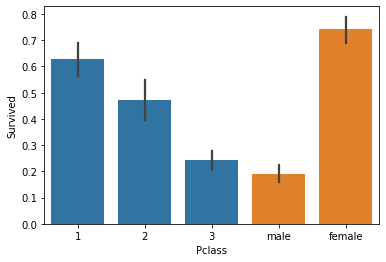

In [79]:
sns.barplot(train_ds,x = "Pclass",y="Survived")
sns.barplot(train_ds,x = "Sex",y="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

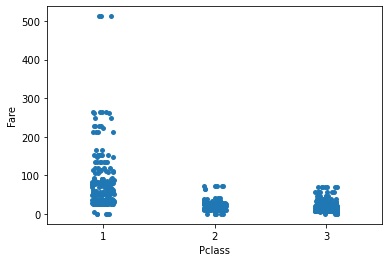

In [119]:
sns.stripplot(train_ds,x = "Pclass",y="Fare")